#### Importing Libraries


In [1]:
import pandas as pd 
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.basemap import Basemap

import seaborn as sns

import os

import geopandas as gpd

from PIL import Image

In [2]:
conda install basemap-data-hires

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


#### Data Loading

In [3]:
zm_data = pd.read_csv("zomato.csv")

#### Data Exploration 

In [4]:
zm_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zm_data.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


In [6]:
zm_data.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
4043,https://www.zomato.com/bangalore/park-n-eat-1-...,"Near kaka singh dhaba, RMZ eco world backgate",Park N Eat,Yes,No,3.7/5,16,+91 9606628430\r\n+91 9035358051,Marathahalli,Quick Bites,NaN,"Chinese, North Indian",300,"[('Rated 4.0', 'RATED\n Have ordered lunch qu...",[],Delivery,Bellandur
23156,https://www.zomato.com/bangalore/55-wall-stree...,"55, 2nd Floor, Goenka Chambers, 19th Main Road...",55 Wall Street,No,Yes,3.9/5,1779,080 49652101,JP Nagar,Bar,"Cocktails, Beer, Bloody Mary, Pasta, Pizza, Bu...","Finger Food, North Indian, Chinese","1,300","[('Rated 5.0', 'RATED\n Two ways you can enjo...",[],Dine-out,JP Nagar
7741,https://www.zomato.com/bangalore/raj-sweets-wh...,"2/3, Immadihalli Road, Near Balaji Sunflower A...",Raj Sweets,No,No,NEW,0,+91 7022499638,Whitefield,Sweet Shop,NaN,"Mithai, Street Food",200,[],[],Desserts,Brookefield
35494,https://www.zomato.com/bangalore/juicy-momos-b...,"QSR -1, 3rd Floor, Vega City Mall, Srinivas In...",Juicy Momos,Yes,No,3.1 /5,21,+91 9900012191\n+91 9538550509,Bannerghatta Road,Food Court,NaN,"Tibetan, Momos",250,"[('Rated 3.0', ""RATED\n This place is located...","['Steamed Veg Momos [6 Pieces, 1 Plate]', 'Ste...",Delivery,Koramangala 7th Block
27187,https://www.zomato.com/bangalore/litti-twist-h...,"4/1, 1st Main, Bhuvanappa Layout, Opposite For...",Litti Twist,Yes,No,4.2/5,106,+91 9035810598,Hosur Road,Quick Bites,"Paratha, Liti Chokha, Buttermilk, Tea, Aloo Li...","Bihari, North Indian",300,"[('Rated 5.0', 'RATED\n An amazing food outle...",[],Delivery,Koramangala 4th Block


In [7]:
zm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
zm_data.columns.tolist()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [9]:
zm_data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
print(zm_data.dtypes)

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [11]:
zm_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#### Data Cleaning and Preprocessing

In [12]:
nan_df = zm_data[zm_data.isna().any(axis=1)]
nan_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
19,https://www.zomato.com/bangalore/360-atoms-res...,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,+91 9880594520,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari
22,https://www.zomato.com/bangalore/cafe-coffee-d...,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,080 32486296,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
24,https://www.zomato.com/bangalore/hide-out-cafe...,"775/1, Opposite Gupta Collage, 7th Block, 3rd ...",Hide Out Cafe,No,No,3.7/5,31,+91 9901481185,Banashankari,Cafe,NaN,Cafe,300,"[('Rated 4.0', 'RATED\n The food was quite go...",[],Cafes,Banashankari
25,https://www.zomato.com/bangalore/cafe-nova-ban...,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",CAFE NOVA,No,No,3.2/5,11,+91 8971090261,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",[],Cafes,Banashankari


In [13]:
# Drop the 'url' column
nan_df = nan_df.drop(columns=['url'])

nan_df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
19,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,+91 9880594520,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",[],Cafes,Banashankari
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,080 32486296,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",[],Cafes,Banashankari
24,"775/1, Opposite Gupta Collage, 7th Block, 3rd ...",Hide Out Cafe,No,No,3.7/5,31,+91 9901481185,Banashankari,Cafe,NaN,Cafe,300,"[('Rated 4.0', 'RATED\n The food was quite go...",[],Cafes,Banashankari
25,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",CAFE NOVA,No,No,3.2/5,11,+91 8971090261,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",[],Cafes,Banashankari


In [14]:
# Drop the 'menu_item' column
nan_df = nan_df.drop(columns=['menu_item'])

nan_df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari
19,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,+91 9880594520,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",Cafes,Banashankari
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,080 32486296,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",Cafes,Banashankari
24,"775/1, Opposite Gupta Collage, 7th Block, 3rd ...",Hide Out Cafe,No,No,3.7/5,31,+91 9901481185,Banashankari,Cafe,NaN,Cafe,300,"[('Rated 4.0', 'RATED\n The food was quite go...",Cafes,Banashankari
25,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",CAFE NOVA,No,No,3.2/5,11,+91 8971090261,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",Cafes,Banashankari


In [15]:
# Drop the 'phone' column
nan_df = nan_df.drop(columns=['phone'])

nan_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",Buffet,Banashankari
19,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,"[('Rated 5.0', 'RATED\n Friendly staffs , nic...",Cafes,Banashankari
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,"[('Rated 4.0', 'RATED\n This outlet is better...",Cafes,Banashankari
24,"775/1, Opposite Gupta Collage, 7th Block, 3rd ...",Hide Out Cafe,No,No,3.7/5,31,Banashankari,Cafe,NaN,Cafe,300,"[('Rated 4.0', 'RATED\n The food was quite go...",Cafes,Banashankari
25,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",CAFE NOVA,No,No,3.2/5,11,Banashankari,Cafe,NaN,"Cafe, Bakery",600,"[('Rated 1.0', ""RATED\n No ventilation. Smoke...",Cafes,Banashankari


In [16]:
# Drop the 'reviews_list' column
nan_df = nan_df.drop(columns=['reviews_list'])

nan_df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
19,"47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...",360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
22,"SRF Complex, Near BDA Complex, Kathreguppe Mai...",Cafe Coffee Day,No,No,3.6/5,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,Cafes,Banashankari
24,"775/1, Opposite Gupta Collage, 7th Block, 3rd ...",Hide Out Cafe,No,No,3.7/5,31,Banashankari,Cafe,NaN,Cafe,300,Cafes,Banashankari
25,"101, Water Tank Road, 2nd Block, 3rd Stage, Ba...",CAFE NOVA,No,No,3.2/5,11,Banashankari,Cafe,NaN,"Cafe, Bakery",600,Cafes,Banashankari


In [17]:
# Drop the 'address' column
nan_df = nan_df.drop(columns=['address'])

nan_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
19,360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,Banashankari,Cafe,NaN,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
22,Cafe Coffee Day,No,No,3.6/5,28,Banashankari,Cafe,NaN,"Cafe, Fast Food",900,Cafes,Banashankari
24,Hide Out Cafe,No,No,3.7/5,31,Banashankari,Cafe,NaN,Cafe,300,Cafes,Banashankari
25,CAFE NOVA,No,No,3.2/5,11,Banashankari,Cafe,NaN,"Cafe, Bakery",600,Cafes,Banashankari


In [18]:
# Drop the 'dish_liked' column
nan_df = nan_df.drop(columns=['dish_liked'])

nan_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
19,360 Atoms Restaurant And Cafe,Yes,No,3.1/5,13,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
22,Cafe Coffee Day,No,No,3.6/5,28,Banashankari,Cafe,"Cafe, Fast Food",900,Cafes,Banashankari
24,Hide Out Cafe,No,No,3.7/5,31,Banashankari,Cafe,Cafe,300,Cafes,Banashankari
25,CAFE NOVA,No,No,3.2/5,11,Banashankari,Cafe,"Cafe, Bakery",600,Cafes,Banashankari


In [19]:
# Convert 'online_order' column to binary values
nan_df['online_order'] = nan_df['online_order'].map({'Yes': 1, 'No': 0})

nan_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,0,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
19,360 Atoms Restaurant And Cafe,1,No,3.1/5,13,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
22,Cafe Coffee Day,0,No,3.6/5,28,Banashankari,Cafe,"Cafe, Fast Food",900,Cafes,Banashankari
24,Hide Out Cafe,0,No,3.7/5,31,Banashankari,Cafe,Cafe,300,Cafes,Banashankari
25,CAFE NOVA,0,No,3.2/5,11,Banashankari,Cafe,"Cafe, Bakery",600,Cafes,Banashankari


In [20]:
# Convert 'book_table' column to binary values
nan_df['book_table'] = nan_df['book_table'].map({'Yes': 1, 'No': 0})

nan_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
19,360 Atoms Restaurant And Cafe,1,0,3.1/5,13,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
22,Cafe Coffee Day,0,0,3.6/5,28,Banashankari,Cafe,"Cafe, Fast Food",900,Cafes,Banashankari
24,Hide Out Cafe,0,0,3.7/5,31,Banashankari,Cafe,Cafe,300,Cafes,Banashankari
25,CAFE NOVA,0,0,3.2/5,11,Banashankari,Cafe,"Cafe, Bakery",600,Cafes,Banashankari


In [21]:
# Handling Missing Values in rate column and Removing '/5'
nan_df['rate'] = nan_df['rate'].replace(['NEW', '-', 'Opening Soon', 'Temporarily Closed'], pd.NA)
nan_df['rate'] = nan_df['rate'].str.replace('/5', '')

nan_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
19,360 Atoms Restaurant And Cafe,1,0,3.1,13,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
22,Cafe Coffee Day,0,0,3.6,28,Banashankari,Cafe,"Cafe, Fast Food",900,Cafes,Banashankari
24,Hide Out Cafe,0,0,3.7,31,Banashankari,Cafe,Cafe,300,Cafes,Banashankari
25,CAFE NOVA,0,0,3.2,11,Banashankari,Cafe,"Cafe, Bakery",600,Cafes,Banashankari


In [24]:
# Remove rows with NaN values in specified columns
nan_df.dropna(subset=['rate', 'rest_type', 'cuisines', 'approx_cost(for two people)'], inplace=True)

nan_df.reset_index(drop=True, inplace=True)

nan_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Buffet,Banashankari
1,360 Atoms Restaurant And Cafe,1,0,3.1,13,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",400,Cafes,Banashankari
2,Cafe Coffee Day,0,0,3.6,28,Banashankari,Cafe,"Cafe, Fast Food",900,Cafes,Banashankari
3,Hide Out Cafe,0,0,3.7,31,Banashankari,Cafe,Cafe,300,Cafes,Banashankari
4,CAFE NOVA,0,0,3.2,11,Banashankari,Cafe,"Cafe, Bakery",600,Cafes,Banashankari


In [25]:
# Step 1: Replace 'approx_cost(for two people)' column with your actual column name
nan_df['approx_cost'] = nan_df['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
nan_df['approx_cost'] = nan_df['approx_cost'].astype(float)

# Step 2: Replace 'rate' column with your actual column name
nan_df['rate_num'] = nan_df['rate'].astype(str).apply(lambda x: x.split('/')[0])

# Step 3: Ensure the 'rate_num' column name matches your preference
while True:
    try:
        nan_df['rate_num'] = nan_df['rate_num'].astype(float)
        break
    except ValueError as e1:
        noise_entry = str(e1).split(":")[-1].strip().replace("'", "")
        print(f'Treating noisy entry on rate: {noise_entry}')
        nan_df['rate_num'] = nan_df['rate_num'].apply(lambda x: x.replace(noise_entry, str(np.nan)))

# Step 4: Dropping old columns
nan_df.drop(['approx_cost(for two people)', 'rate'], axis=1, inplace=True)
nan_df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,listed_in(type),listed_in(city),approx_cost,rate_num
0,Rosewood International Hotel - Bar & Restaurant,0,0,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",Buffet,Banashankari,800.0,3.6
1,360 Atoms Restaurant And Cafe,1,0,13,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",Cafes,Banashankari,400.0,3.1
2,Cafe Coffee Day,0,0,28,Banashankari,Cafe,"Cafe, Fast Food",Cafes,Banashankari,900.0,3.6
3,Hide Out Cafe,0,0,31,Banashankari,Cafe,Cafe,Cafes,Banashankari,300.0,3.7
4,CAFE NOVA,0,0,11,Banashankari,Cafe,"Cafe, Bakery",Cafes,Banashankari,600.0,3.2


In [26]:
nan_df.isnull().sum()

name               0
online_order       0
book_table         0
votes              0
location           0
rest_type          0
cuisines           0
listed_in(type)    0
listed_in(city)    0
approx_cost        0
rate_num           0
dtype: int64

In [27]:
nan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18217 entries, 0 to 18216
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             18217 non-null  object 
 1   online_order     18217 non-null  int64  
 2   book_table       18217 non-null  int64  
 3   votes            18217 non-null  int64  
 4   location         18217 non-null  object 
 5   rest_type        18217 non-null  object 
 6   cuisines         18217 non-null  object 
 7   listed_in(type)  18217 non-null  object 
 8   listed_in(city)  18217 non-null  object 
 9   approx_cost      18217 non-null  float64
 10  rate_num         18217 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 1.5+ MB


#### Data Visualization

Text(0.5, 1.0, 'Banglore City')

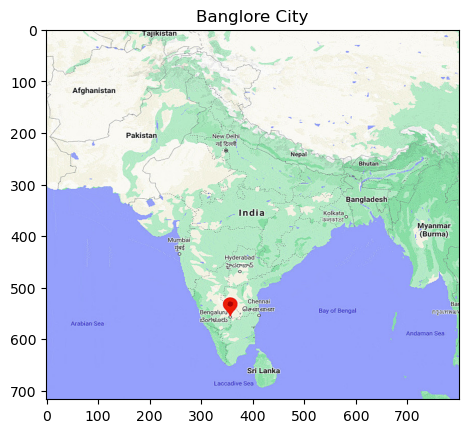

In [28]:
img = Image.open('blr.jpg')
plt.imshow(img)
plt.title('Banglore City')

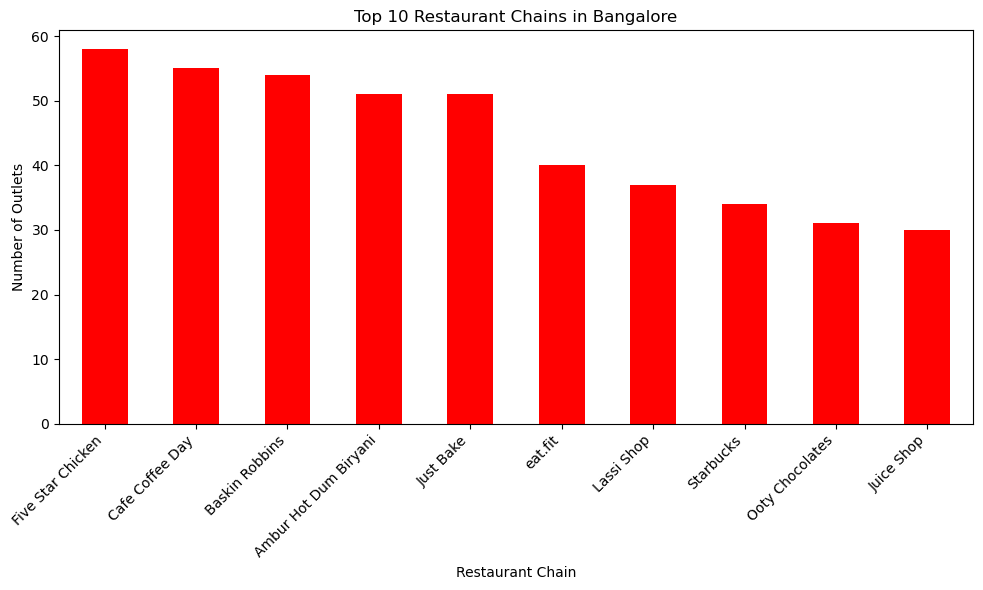

In [29]:
restaurant_chains_count = nan_df['name'].value_counts()

# Get the top 10 restaurant chains in Bangalore
top_restaurant_chains = restaurant_chains_count.head(10)

plt.figure(figsize=(10, 6))
top_restaurant_chains.plot(kind='bar', color='red')
plt.title('Top 10 Restaurant Chains in Bangalore')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

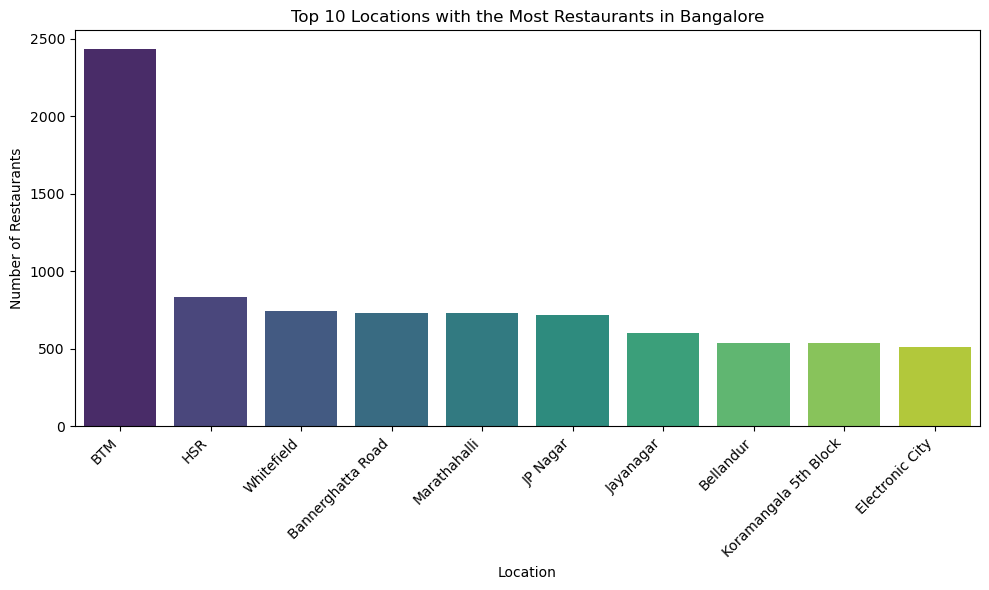

In [33]:
top_10_locations = nan_df['location'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations.index, y=top_10_locations.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.title('Top 10 Locations with the Most Restaurants in Bangalore')
plt.tight_layout()
plt.show()

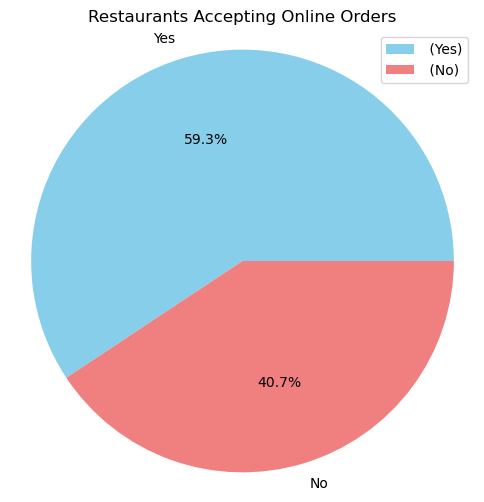

In [30]:
online_order_count = nan_df['online_order'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(online_order_count, labels=['Yes', 'No'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Restaurants Accepting Online Orders')
plt.axis('equal') 

legend_labels = [' (Yes)', ' (No)']
plt.legend(legend_labels, loc='upper right')

plt.show()

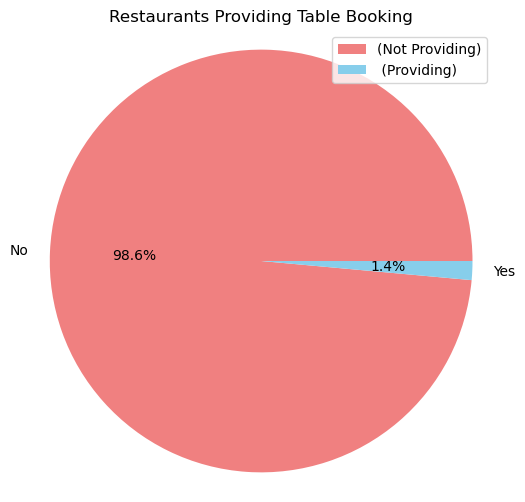

In [31]:
book_table_count = nan_df['book_table'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(book_table_count, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Restaurants Providing Table Booking')
plt.axis('equal')

legend_labels = ['(Not Providing)', ' (Providing)']
plt.legend(legend_labels, loc='upper right')

plt.show()

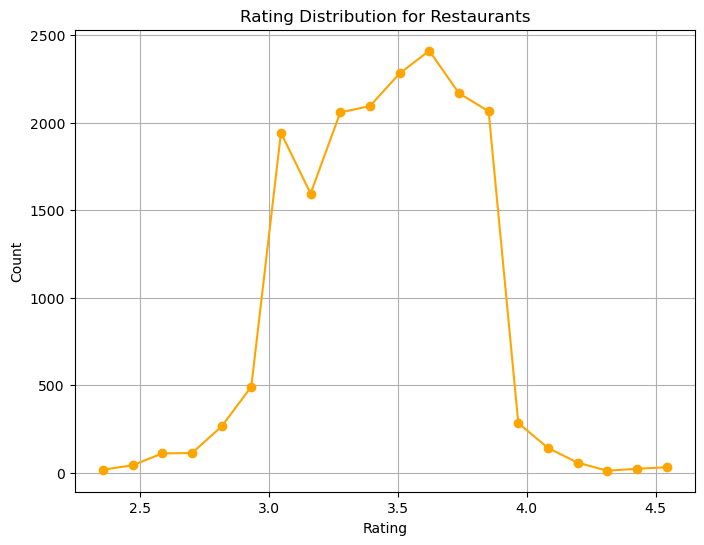

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
counts, bins, _ = plt.hist(nan_df['rate_num'], bins=20, color='skyblue', edgecolor='black')
plt.close()  

bin_midpoints = (bins[1:] + bins[:-1]) / 2

plt.figure(figsize=(8, 6))
plt.plot(bin_midpoints, counts, marker='o', linestyle='-', color='orange')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution for Restaurants')
plt.grid(True)
plt.show()

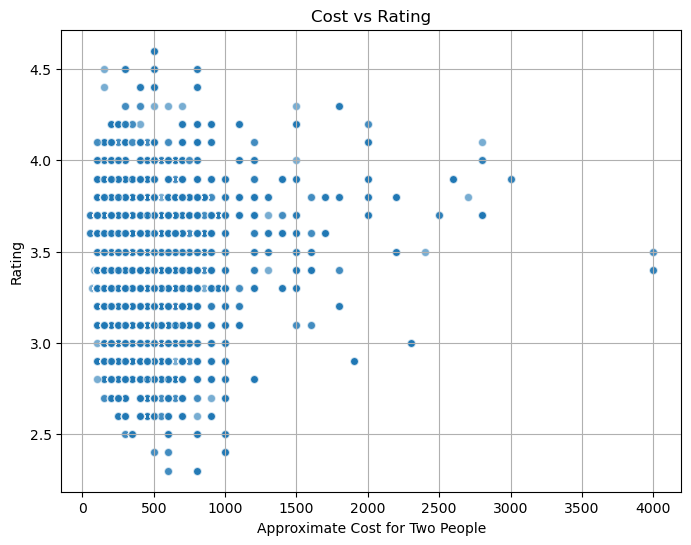

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(nan_df['approx_cost'], nan_df['rate_num'], alpha=0.6, edgecolors='w')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Rating')
plt.title('Cost vs Rating')
plt.grid(True)
plt.show()

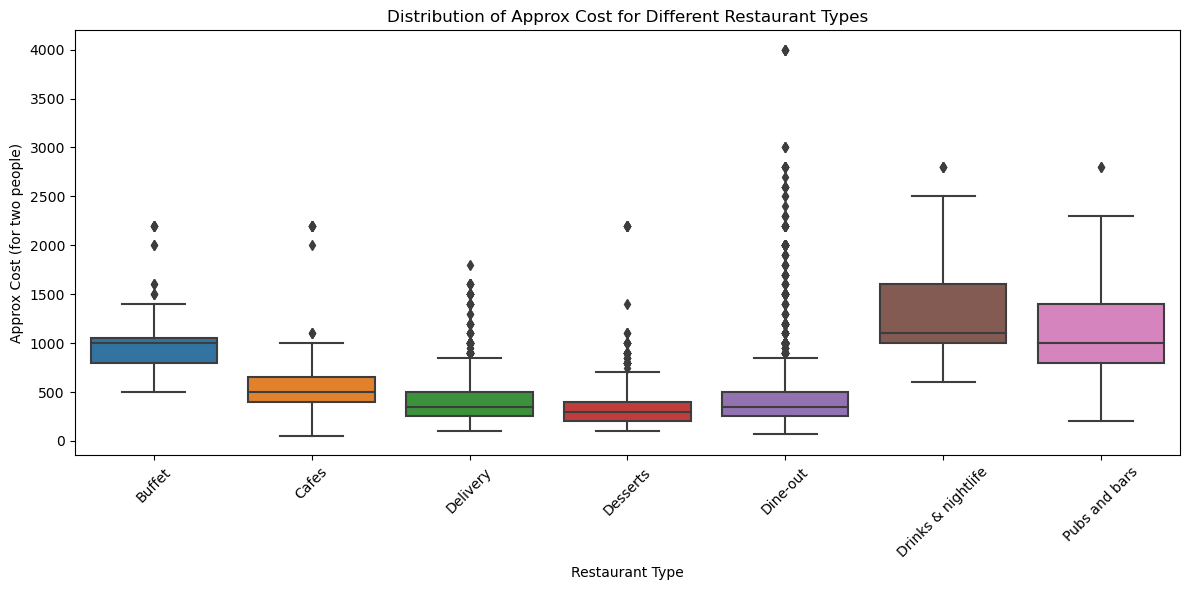

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in(type)', y='approx_cost', data=nan_df)

plt.title('Distribution of Approx Cost for Different Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Approx Cost (for two people)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

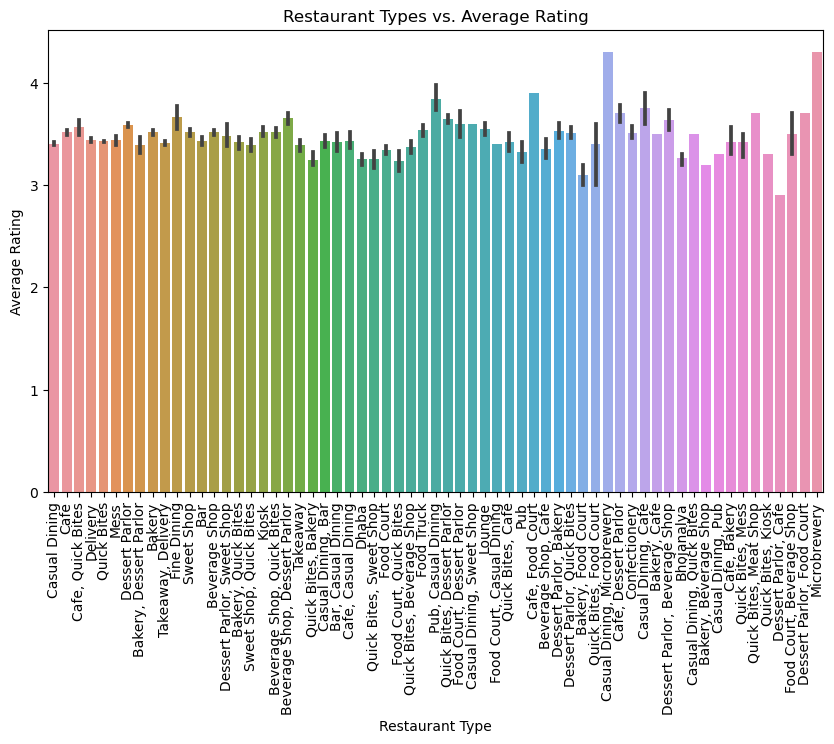

In [36]:
## Restaurant Types vs. Average Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='rest_type', y='rate_num', data=nan_df)
plt.xticks(rotation=90)
plt.title("Restaurant Types vs. Average Rating")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Rating")
plt.show()

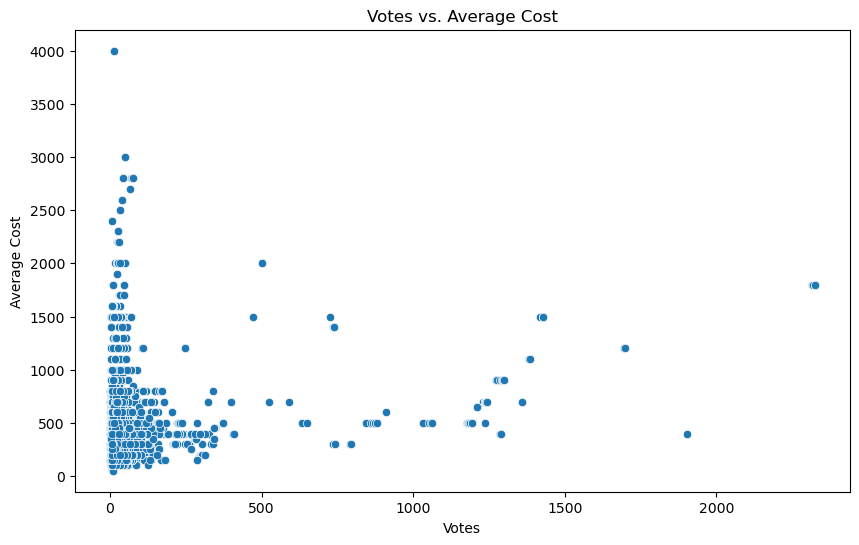

In [37]:
# Votes vs average cost 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='approx_cost', data=nan_df)
plt.title("Votes vs. Average Cost")
plt.xlabel("Votes")
plt.ylabel("Average Cost")
plt.show()

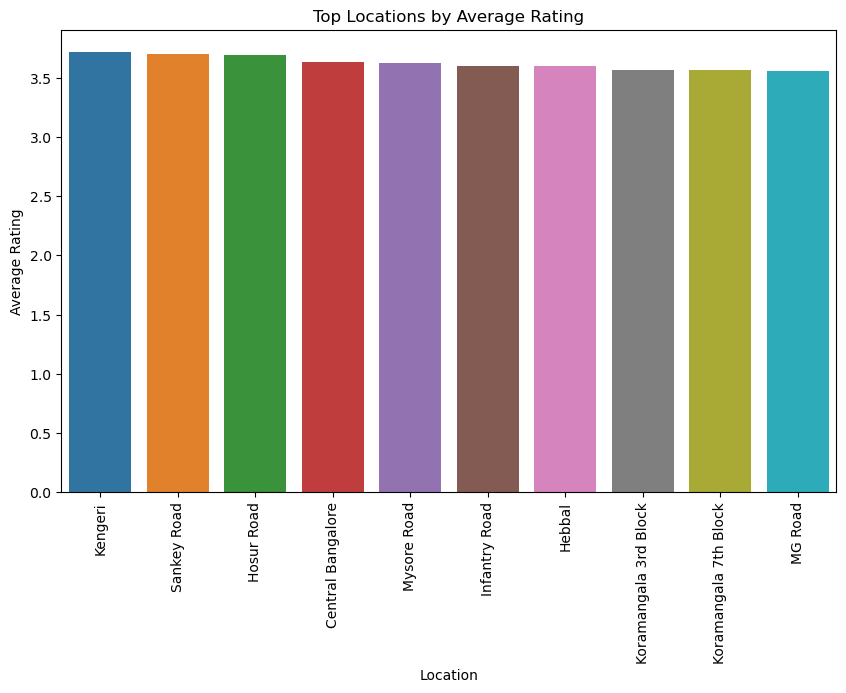

In [38]:
# top locations by average rating 
top_locations = nan_df.groupby('location')['rate_num'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=90)
plt.title("Top Locations by Average Rating")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.show()

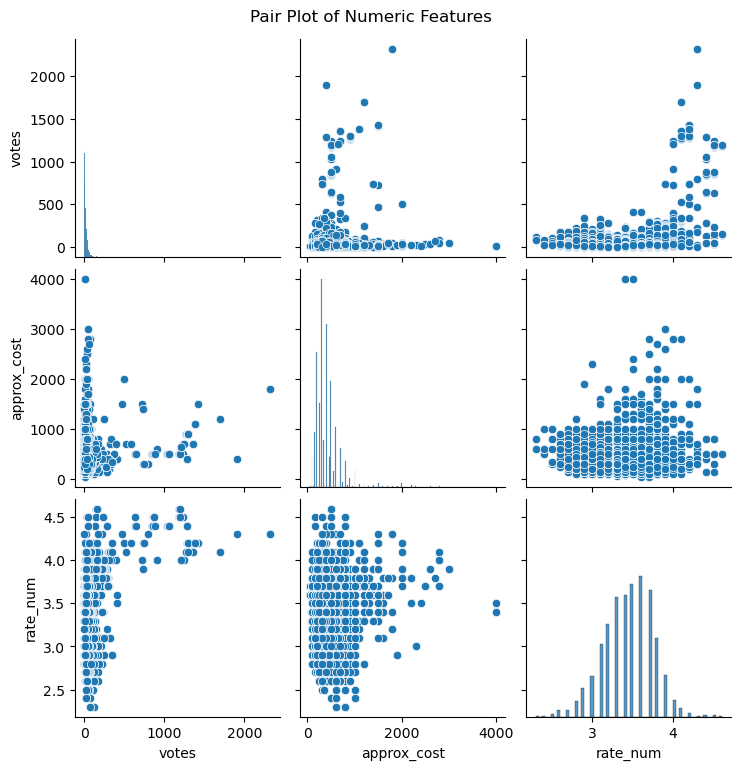

In [39]:
# relationship between numeric features 

sns.pairplot(nan_df[['votes', 'approx_cost', 'rate_num']])
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

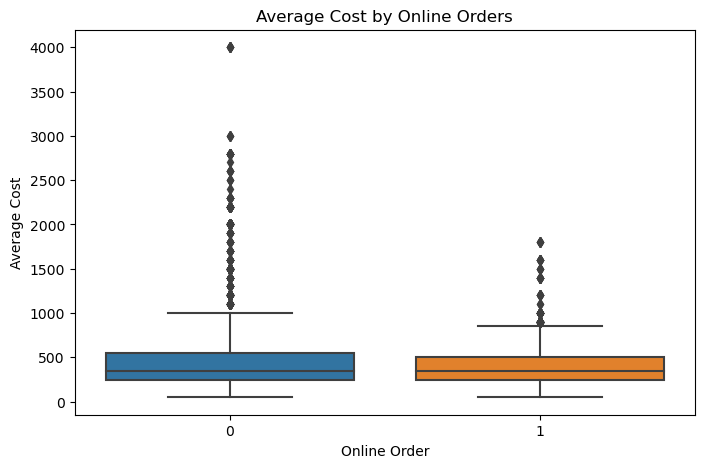

In [40]:
# average cost by online orders no=0 and yes=1 
plt.figure(figsize=(8, 5))
sns.boxplot(x='online_order', y='approx_cost', data=nan_df)
plt.title("Average Cost by Online Orders")
plt.xlabel("Online Order")
plt.ylabel("Average Cost")
plt.show()

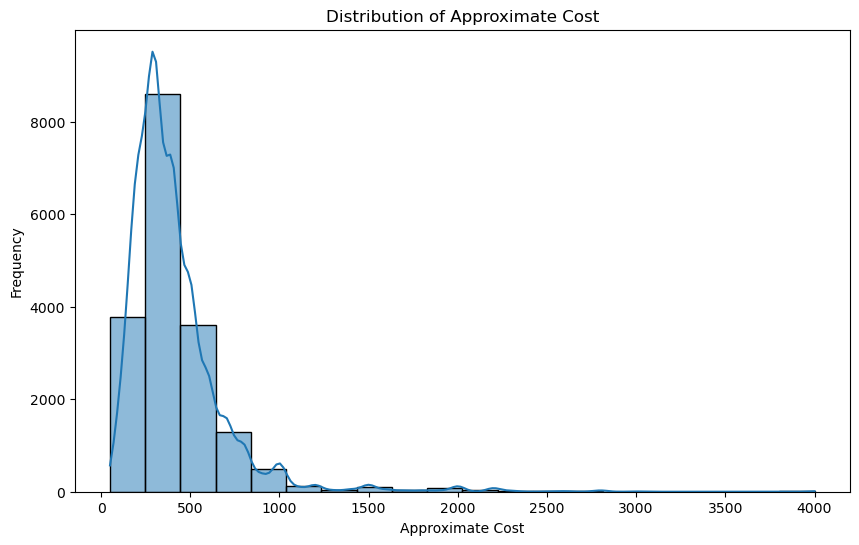

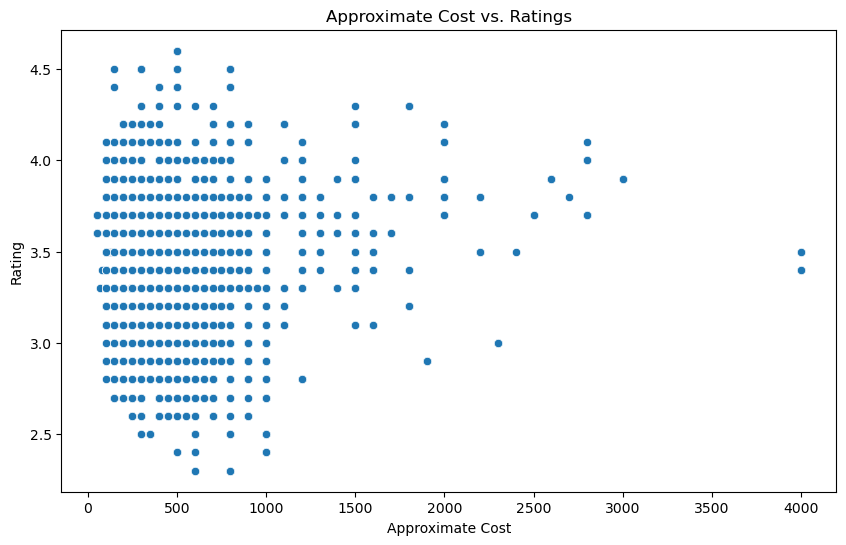

In [50]:
# distribution of approximate cost and relationship with rating 
plt.figure(figsize=(10, 6))
sns.histplot(data=nan_df, x='approx_cost', bins=20, kde=True)
plt.title("Distribution of Approximate Cost")
plt.xlabel("Approximate Cost")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=nan_df, x='approx_cost', y='rate_num')
plt.title("Approximate Cost vs. Ratings")
plt.xlabel("Approximate Cost")
plt.ylabel("Rating")
plt.show()

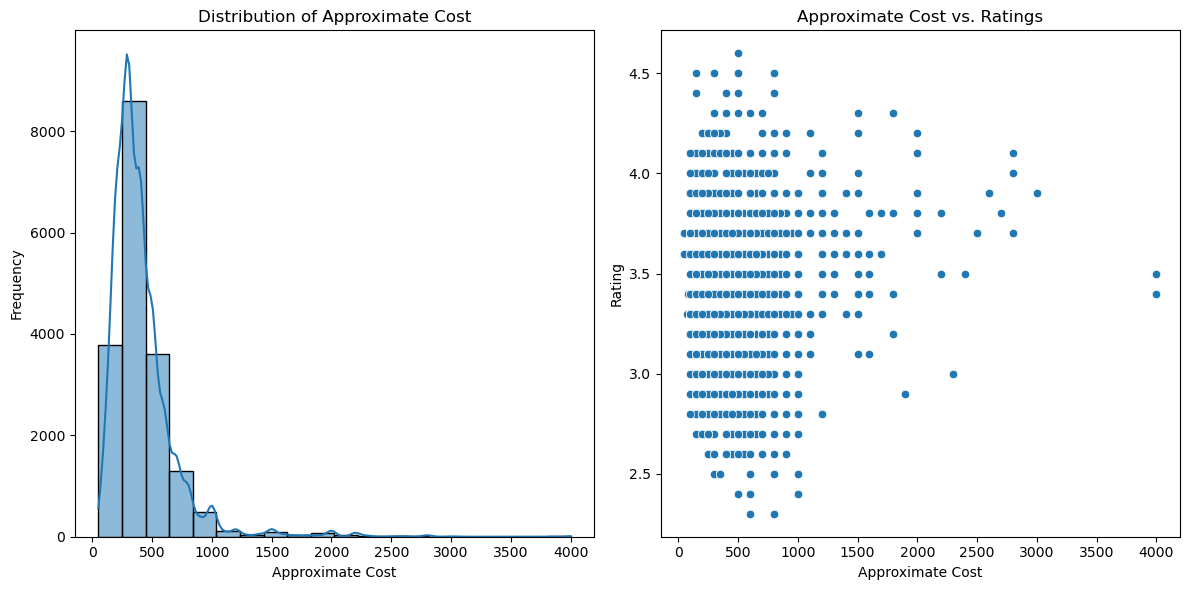

In [53]:
# distribution of approx cost and relationship with rating 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=nan_df, x='approx_cost', bins=20, kde=True)
plt.title("Distribution of Approximate Cost")
plt.xlabel("Approximate Cost")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.scatterplot(data=nan_df, x='approx_cost', y='rate_num')
plt.title("Approximate Cost vs. Ratings")
plt.xlabel("Approximate Cost")
plt.ylabel("Rating")

plt.tight_layout()
plt.show()

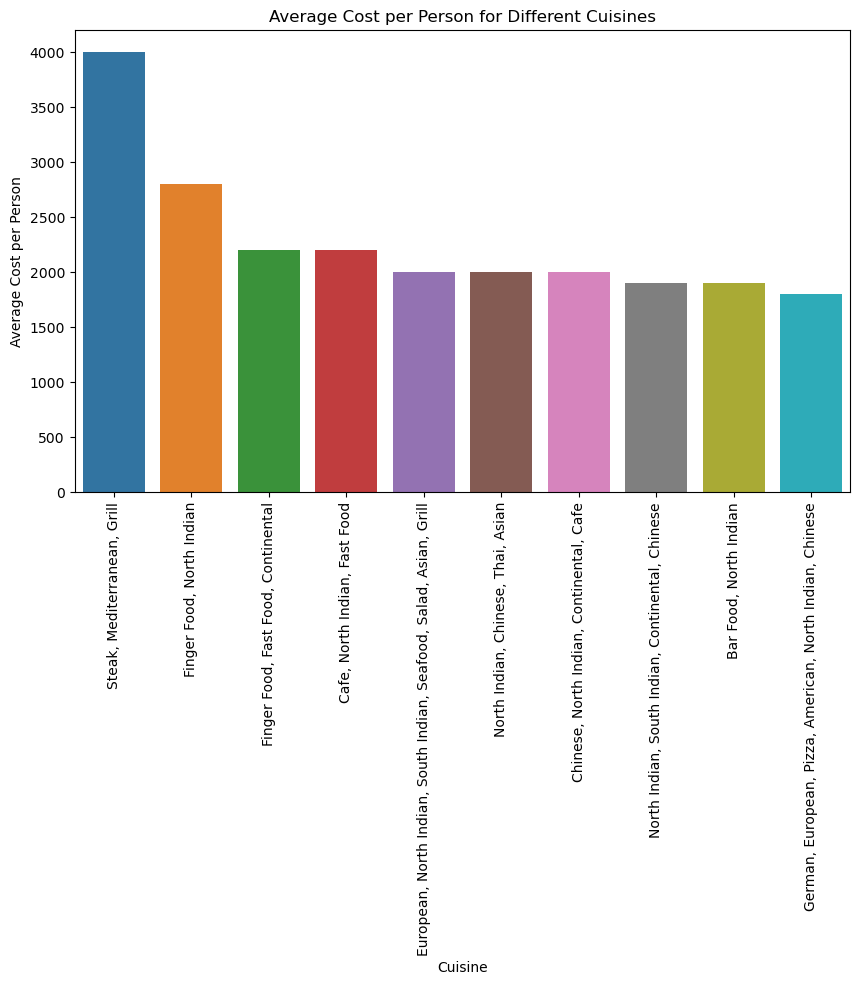

In [54]:
# average cost for 2 for different cuisines
plt.figure(figsize=(10, 6))

avg_cost_per_person_by_cuisine = avg_cost_per_person_by_cuisine.sort_values(ascending=False).head(10)
sns.barplot(x=avg_cost_per_person_by_cuisine.index, y=avg_cost_per_person_by_cuisine.values)
plt.title("Average Cost per Person for Different Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Average Cost per Person")
plt.xticks(rotation=90)
plt.show()

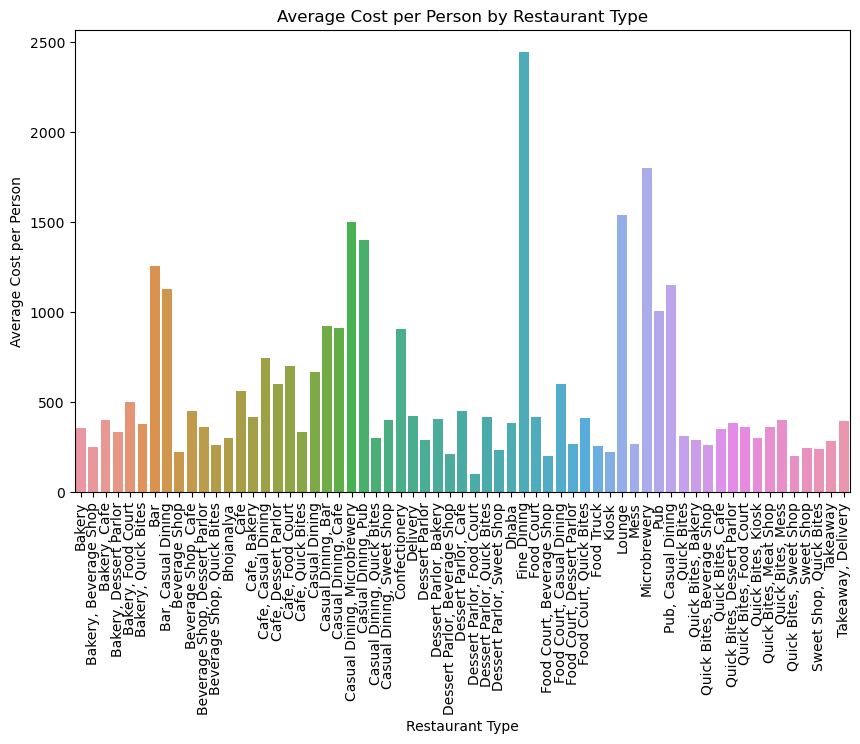

In [55]:
# Average cost for 2 persons by restaurant type
plt.figure(figsize=(10, 6))

sns.barplot(x=avg_cost_per_person_by_rest_type.index, y=avg_cost_per_person_by_rest_type.values)
plt.title("Average Cost per Person by Restaurant Type")
plt.xlabel("Restaurant Type")
plt.ylabel("Average Cost per Person")
plt.xticks(rotation=90)
plt.show()

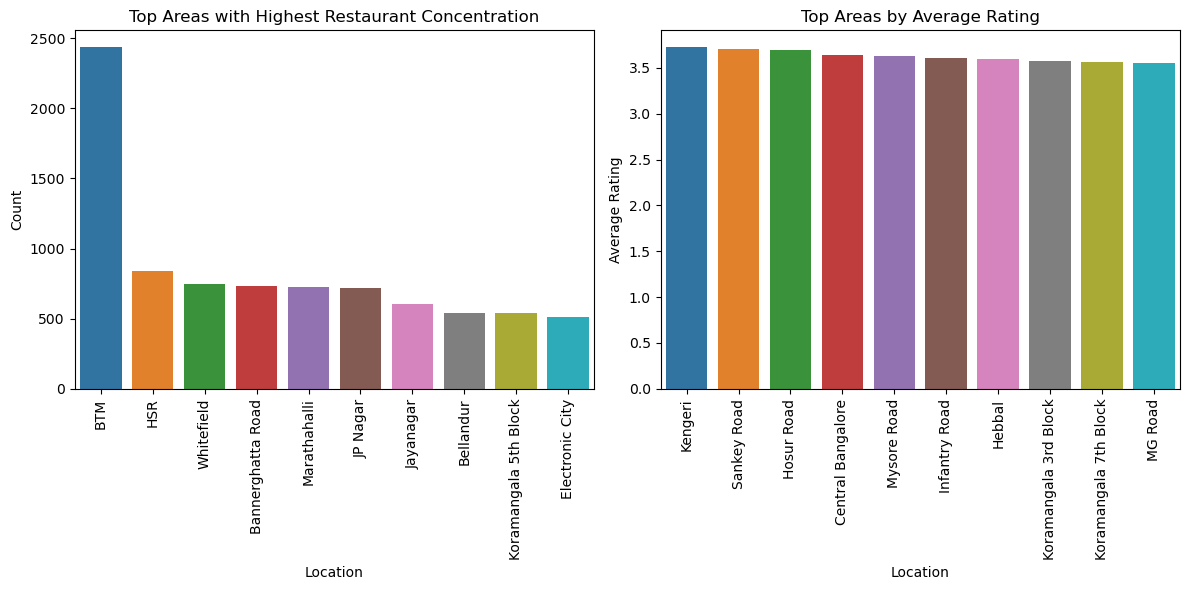

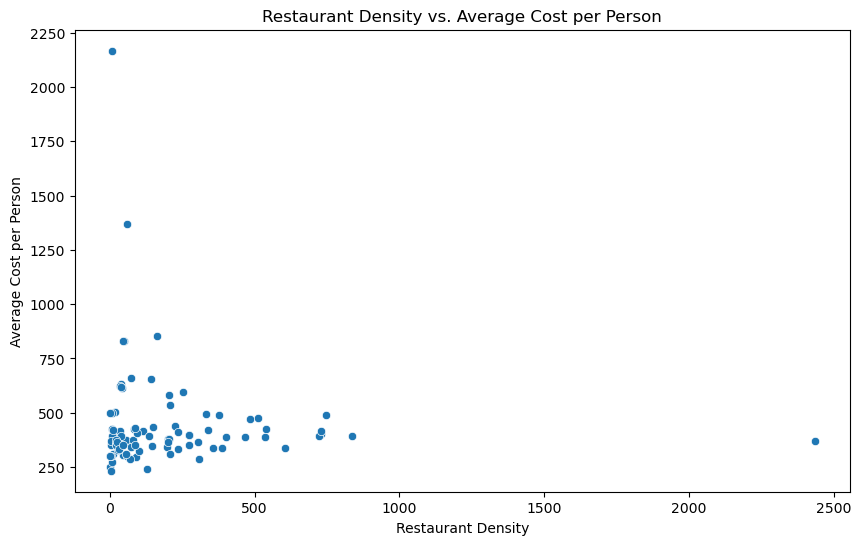

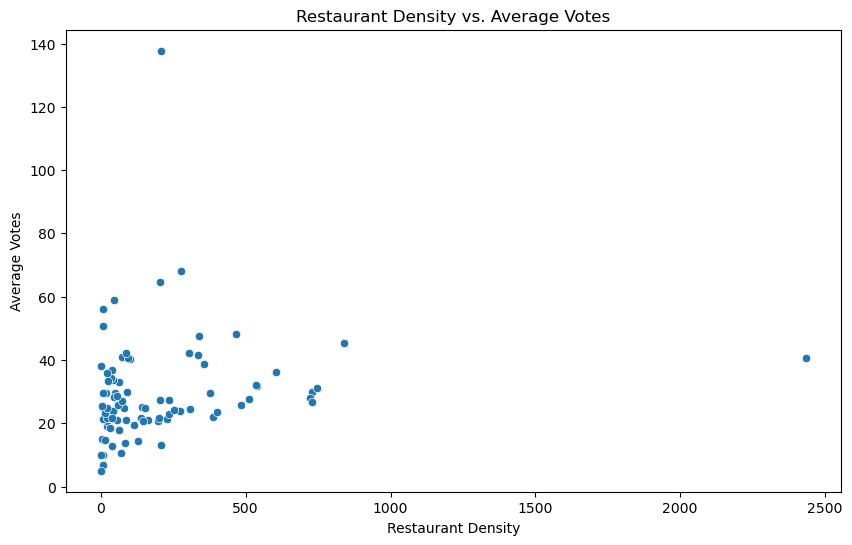

In [61]:
# location analysis visualization 
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=location_counts.head(10).index, y=location_counts.head(10).values)
plt.title("Top Areas with Highest Restaurant Concentration")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=avg_rating_by_location.sort_values(ascending=False).head(10).index, y=avg_rating_by_location.sort_values(ascending=False).head(10).values)
plt.title("Top Areas by Average Rating")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=location_counts, y=avg_cost_by_location)
plt.title("Restaurant Density vs. Average Cost per Person")
plt.xlabel("Restaurant Density")
plt.ylabel("Average Cost per Person")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=location_counts, y=avg_votes_by_location)
plt.title("Restaurant Density vs. Average Votes")
plt.xlabel("Restaurant Density")
plt.ylabel("Average Votes")
plt.show()

#### Data Analysis

In [41]:
# Finding the restaurant with the highest approximate cost
most_expensive_index = nan_df['approx_cost'].idxmax()
most_expensive_restaurant = nan_df.loc[most_expensive_index, 'name']
most_expensive_cost = nan_df.loc[most_expensive_index, 'approx_cost']

# Finding the restaurant with the lowest approximate cost
least_expensive_index = nan_df['approx_cost'].idxmin()
least_expensive_restaurant = nan_df.loc[least_expensive_index, 'name']
least_expensive_cost = nan_df.loc[least_expensive_index, 'approx_cost']

print(f"The most expensive restaurant is {most_expensive_restaurant} with an approximate cost of {most_expensive_cost} for two.")
print(f"The least expensive restaurant is {least_expensive_restaurant} with an approximate cost of {least_expensive_cost}.for two")

The most expensive restaurant is Grill 99 - The Ritz-Carlton with an approximate cost of 4000.0 for two.
The least expensive restaurant is Savera Cafe with an approximate cost of 50.0.for two


In [42]:
# Finding the restaurant with the highest rating
highest_rated_index = nan_df['rate_num'].idxmax()
highest_rated_restaurant = nan_df.loc[highest_rated_index, 'name']
highest_rating = nan_df.loc[highest_rated_index, 'rate_num']

# Finding the restaurant with the lowest rating
lowest_rated_index = nan_df['rate_num'].idxmin()
lowest_rated_restaurant = nan_df.loc[lowest_rated_index, 'name']
lowest_rating = nan_df.loc[lowest_rated_index, 'rate_num']

print(f"The highest rated restaurant is {highest_rated_restaurant} with a rating of {highest_rating} out of 5.")
print(f"The lowest rated restaurant is {lowest_rated_restaurant} with a rating of {lowest_rating} out of 5.")

The highest rated restaurant is eat.fit with a rating of 4.6 out of 5.
The lowest rated restaurant is Bhagini with a rating of 2.3 out of 5.


In [43]:
# Counting the occurrences of each restaurant type
restaurant_types_count = nan_df['listed_in(type)'].value_counts()

print(restaurant_types_count)

Delivery              9877
Dine-out              6112
Desserts              1379
Cafes                  465
Drinks & nightlife     174
Pubs and bars          115
Buffet                  95
Name: listed_in(type), dtype: int64


In [45]:
# restaurants who provide online orders and table booking in percentage
online_order_counts = nan_df['online_order'].value_counts()
table_booking_counts = nan_df['book_table'].value_counts()

online_order_percentage = (online_order_counts / len(nan_df)) * 100
table_booking_percentage = (table_booking_counts / len(nan_df)) * 100


print("\nOnline Order Percentage:")
print(online_order_percentage)

print("\nTable Booking Percentage:")
print(table_booking_percentage)


Online Order Percentage:
1    59.31273
0    40.68727
Name: online_order, dtype: float64

Table Booking Percentage:
0    98.556294
1     1.443706
Name: book_table, dtype: float64


In [46]:
# average rating comparison: online orders and table booking 

avg_rating_online = nan_df.groupby('online_order')['rate_num'].mean()
avg_rating_table = nan_df.groupby('book_table')['rate_num'].mean()

print("Average Rating by Online Orders:")
print(avg_rating_online)

print("\nAverage Rating by Table Booking:")
print(avg_rating_table)

Average Rating by Online Orders:
online_order
0    3.414004
1    3.467941
Name: rate_num, dtype: float64

Average Rating by Table Booking:
book_table
0    3.441556
1    3.749049
Name: rate_num, dtype: float64


In [47]:
# Count the occurrences of each cuisine
cuisine_counts = nan_df['cuisines'].value_counts()

# Display the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines:")
print(cuisine_counts.head(10))

Top 10 Most Popular Cuisines:
North Indian, Chinese                  1176
North Indian                            972
South Indian                            873
Biryani                                 433
Bakery, Desserts                        398
Fast Food                               364
Cafe                                    347
Desserts                                341
South Indian, North Indian, Chinese     328
Bakery                                  312
Name: cuisines, dtype: int64


In [48]:
# analyze cuisines types and rating/votes 
avg_rating_by_cuisine = nan_df.groupby('cuisines')['rate_num'].mean()
avg_votes_by_cuisine = nan_df.groupby('cuisines')['votes'].mean()

print("Top Cuisines by Average Rating:")
print(avg_rating_by_cuisine.sort_values(ascending=False).head(10))

print("\nTop Cuisines by Average Votes:")
print(avg_votes_by_cuisine.sort_values(ascending=False).head(10))

Top Cuisines by Average Rating:
cuisines
Healthy Food, North Indian, Biryani, Continental, Sandwich, Desserts    4.488889
Chinese, Continental, North Indian, Italian, Seafood                    4.450000
German, European, Pizza, American, North Indian, Chinese                4.300000
Healthy Food, North Indian, Biryani, Continental, Desserts              4.300000
BBQ, North Indian                                                       4.300000
Continental, Chinese, Finger Food, North Indian                         4.200000
Chinese, North Indian, Continental, Cafe                                4.200000
Continental, North Indian, Mughlai                                      4.200000
Arabian, Mughlai, Biryani, North Indian, Chinese, Seafood               4.160000
Healthy Food, Desserts                                                  4.100000
Name: rate_num, dtype: float64

Top Cuisines by Average Votes:
cuisines
German, European, Pizza, American, North Indian, Chinese                2320.

In [49]:
# explore restaurant types and ratings 
rest_type_counts = nan_df['rest_type'].value_counts()

print("Top 10 Restaurant Types:")
print(rest_type_counts.head(10))

avg_rating_by_rest_type = nan_df.groupby('rest_type')['rate_num'].mean()

print("\nAverage Ratings by Restaurant Type:")
print(avg_rating_by_rest_type.sort_values(ascending=False))

Top 10 Restaurant Types:
Quick Bites           8661
Casual Dining         2316
Cafe                  1048
Delivery              1000
Takeaway, Delivery     938
Dessert Parlor         776
Bakery                 547
Beverage Shop          502
Bar                    283
Food Court             281
Name: rest_type, dtype: int64

Average Ratings by Restaurant Type:
rest_type
Casual Dining, Microbrewery    4.300000
Microbrewery                   4.300000
Cafe, Food Court               3.900000
Pub, Casual Dining             3.842105
Casual Dining, Cafe            3.750000
                                 ...   
Quick Bites, Bakery            3.250000
Food Court, Quick Bites        3.234091
Bakery, Beverage Shop          3.200000
Bakery, Food Court             3.100000
Dessert Parlor, Cafe           2.900000
Name: rate_num, Length: 63, dtype: float64


In [51]:
# average cost for two persons for different cuisines
avg_cost_per_person_by_cuisine = nan_df.groupby('cuisines')['approx_cost'].mean()

print("Top Cuisines by Average Cost per Person:")
print(avg_cost_per_person_by_cuisine.sort_values(ascending=False).head(10))

Top Cuisines by Average Cost per Person:
cuisines
Steak, Mediterranean, Grill                                           4000.0
Finger Food, North Indian                                             2800.0
Finger Food, Fast Food, Continental                                   2200.0
Cafe, North Indian, Fast Food                                         2200.0
European, North Indian, South Indian, Seafood, Salad, Asian, Grill    2000.0
North Indian, Chinese, Thai, Asian                                    2000.0
Chinese, North Indian, Continental, Cafe                              2000.0
North Indian, South Indian, Continental, Chinese                      1900.0
Bar Food, North Indian                                                1900.0
German, European, Pizza, American, North Indian, Chinese              1800.0
Name: approx_cost, dtype: float64


In [52]:
# average cost two persons for different restaurant types
avg_cost_per_person_by_rest_type = nan_df.groupby('rest_type')['approx_cost'].mean()

print("Average Cost per Person by Restaurant Type:")
print(avg_cost_per_person_by_rest_type.sort_values(ascending=False))

Average Cost per Person by Restaurant Type:
rest_type
Fine Dining                      2445.161290
Microbrewery                     1800.000000
Lounge                           1540.963855
Casual Dining, Microbrewery      1500.000000
Casual Dining, Pub               1400.000000
                                    ...     
Beverage Shop                     221.513944
Dessert Parlor, Beverage Shop     210.416667
Quick Bites, Sweet Shop           201.470588
Food Court, Beverage Shop         200.000000
Dessert Parlor, Food Court        100.000000
Name: approx_cost, Length: 63, dtype: float64


In [58]:
# Location analysis 

# Identifying Areas with the Highest Concentration of Restaurants
location_counts = nan_df['location'].value_counts()

print("Top 10 Areas with Highest Restaurant Concentration:")
print(location_counts.head(10))

Top 10 Areas with Highest Restaurant Concentration:
BTM                      2433
HSR                       838
Whitefield                747
Bannerghatta Road         730
Marathahalli              729
JP Nagar                  721
Jayanagar                 604
Bellandur                 538
Koramangala 5th Block     537
Electronic City           513
Name: location, dtype: int64


In [59]:
 # Analyzing Restaurant Density and Average Rating
    
avg_rating_by_location = nan_df.groupby('location')['rate_num'].mean()

print("Top Areas by Average Rating:")
print(avg_rating_by_location.sort_values(ascending=False).head(10))

Top Areas by Average Rating:
location
Kengeri                  3.722222
Sankey Road              3.700000
Hosur Road               3.693750
Central Bangalore        3.640000
Mysore Road              3.630769
Infantry Road            3.602222
Hebbal                   3.600000
Koramangala 3rd Block    3.572414
Koramangala 7th Block    3.564497
MG Road                  3.557635
Name: rate_num, dtype: float64


In [60]:
# Analyzing Restaurant Density and Other Features

avg_cost_by_location = nan_df.groupby('location')['approx_cost'].mean()
avg_votes_by_location = nan_df.groupby('location')['votes'].mean()

print("Top Areas by Average Cost per Person:")
print(avg_cost_by_location.sort_values(ascending=False).head(10))

print("\nTop Areas by Average Votes:")
print(avg_votes_by_location.sort_values(ascending=False).head(10))

Top Areas by Average Cost per Person:
location
Sankey Road         2166.666667
Race Course Road    1368.333333
Residency Road       852.160494
Infantry Road        831.111111
Hosur Road           829.166667
Seshadripuram        660.273973
Cunningham Road      657.746479
Church Street        632.894737
Lavelle Road         622.222222
St. Marks Road       616.666667
Name: approx_cost, dtype: float64

Top Areas by Average Votes:
location
Koramangala 4th Block    137.722488
Malleshwaram              68.090909
MG Road                   64.571429
Vijay Nagar               58.851064
Hebbal                    56.250000
Kengeri                   50.666667
Indiranagar               48.081545
Koramangala 7th Block     47.612426
HSR                       45.254177
Rajajinagar               42.355263
Name: votes, dtype: float64
